## Importing

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import random 
random.seed(100) 
import os
import numpy
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import skimage 
import cv2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , accuracy_score
import pandas as pd
import glob 
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input ,Flatten , Dropout, Dense , Conv2D ,BatchNormalization , MaxPooling2D
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from sklearn import preprocessing
import pickle
from keras.regularizers import l2
import keras,os
from keras.models import Sequential
from keras.applications import vgg16
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf
import keras
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import preprocessing
from skimage.transform import resize

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Functions

In [ ]:
def resize_img(img,size):
    img=resize(img,size)
    return img
def readData(class_names, baseURl):
    imgs=[]
    for i in class_names:
        imgs.append(glob.glob(os.path.join(baseURl, i, '*')))
    return imgs

## Preparing data

In [103]:
trainData = "C:/Users/mm/Desktop/output/train22"
train_class_names = os.listdir((trainData))
train_class_namesAug=train_class_names
train_class_names_label=np.array(train_class_names)
train_class_names_label
train_class_namesAug

['egypt',
 'France',
 'Greece',
 'India',
 'italy',
 'Malysia',
 'Spain',
 'turkey',
 'UK2',
 'USA']

In [8]:
le = preprocessing.LabelEncoder()
le.fit(train_class_names_label)
le.classes_

array(['France', 'Greece', 'India', 'Malysia', 'Spain', 'UK2', 'USA',
       'egypt', 'italy', 'turkey'], dtype='<U7')

In [9]:
train_class_names_label=le.transform(train_class_names_label)
train_class_names_label

array([7, 0, 1, 2, 8, 3, 4, 9, 5, 6])

In [10]:
testData ="C:/Users/mm/Desktop/output/test"
testing_class_names = os.listdir((testData))
testing_class_names_label= np.array(train_class_names)
testing_class_names_label
testing_class_names_label=le.transform(testing_class_names_label)
testing_class_names_label

array([7, 0, 1, 2, 8, 3, 4, 9, 5, 6])

In [11]:
valData = "C:/Users/mm/Desktop/output/val"
val_class_names = os.listdir((valData))
val_class_names_label= np.array(val_class_names)

val_class_names_label=le.transform(val_class_names_label)
val_class_names_label

array([7, 0, 1, 2, 8, 3, 4, 9, 5, 6])

In [12]:
Data_Train =readData(train_class_names , trainData)
Data_test  =readData(testing_class_names ,testData)
Data_val  =readData(val_class_names ,valData)

In [13]:
X_train=[]
y_train=[]
for index , ele in enumerate(Data_Train):
    for  j , img  in enumerate(ele):
        X_train.append(cv2.resize(cv2.imread(img), (64,64)))
        y_train.append(train_class_names_label[index])

In [14]:
X_test=[]
y_test=[]
for index , ele in enumerate(Data_test):
    for  j , img  in enumerate(ele):
        X_test.append(cv2.resize(cv2.imread(img),(64,64)))
        y_test.append(testing_class_names_label[index])

In [15]:
X_val=[]
y_val=[]
for index , ele in enumerate(Data_val):
    for  j , img  in enumerate(ele):
        X_val.append(cv2.resize(cv2.imread(img),(64,64)))
        y_val.append(val_class_names_label[index])

In [16]:
mlb= LabelBinarizer()
y_train=mlb.fit_transform(y_train)
y_val=mlb.fit_transform(y_val)

In [24]:
imgs_resized_train=[]
for img in X_train: imgs_resized_train.append(resize_img(img,(64,64,3)))
    
imgs_resized_train=np.array(imgs_resized_train)

In [25]:
imgs_resized_test=[]
for img in X_test: imgs_resized_test.append(resize_img(img,(64,64,3)))
    
imgs_resized_test=np.array(imgs_resized_test)

In [26]:
imgs_resized_val=[]
for img in X_val: imgs_resized_val.append(resize_img(img,(64,64,3)))
    
imgs_resized_val=np.array(imgs_resized_val)

## **VGG16 Model**

In [85]:
vgg_model = VGG16(weights='imagenet', include_top=False,  input_shape=(64, 64, 3))
for layer in vgg_model.layers:
    layer.trainable = False


x = vgg_model.layers[-1].output
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

from tensorflow.keras.models import Model
vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)

In [84]:
vgg_model_transfer.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [56]:
Adam= tf.keras.optimizers.Adam(learning_rate=0.001, name="Adam")
vgg_model_transfer.compile(loss='categorical_crossentropy', optimizer=Adam,  metrics=['acc'])

history = vgg_model_transfer.fit(imgs_resized_train, y_train, batch_size=64, epochs=600, verbose=2, 
                                 validation_data=(imgs_resized_val, y_val))

Epoch 1/600
5/5 - 4s - loss: 2.4814 - acc: 0.1200 - val_loss: 2.2875 - val_acc: 0.1364 - 4s/epoch - 761ms/step
Epoch 2/600
5/5 - 3s - loss: 2.2160 - acc: 0.1800 - val_loss: 2.2307 - val_acc: 0.1869 - 3s/epoch - 608ms/step
Epoch 3/600
5/5 - 3s - loss: 2.0978 - acc: 0.2433 - val_loss: 2.1276 - val_acc: 0.2475 - 3s/epoch - 575ms/step
Epoch 4/600
5/5 - 3s - loss: 1.9705 - acc: 0.3567 - val_loss: 2.0615 - val_acc: 0.3232 - 3s/epoch - 562ms/step
Epoch 5/600
5/5 - 3s - loss: 1.8637 - acc: 0.4200 - val_loss: 2.0026 - val_acc: 0.3586 - 3s/epoch - 567ms/step
Epoch 6/600
5/5 - 3s - loss: 1.7764 - acc: 0.4867 - val_loss: 1.9479 - val_acc: 0.3586 - 3s/epoch - 592ms/step
Epoch 7/600
5/5 - 3s - loss: 1.6897 - acc: 0.5433 - val_loss: 1.8985 - val_acc: 0.4040 - 3s/epoch - 571ms/step
Epoch 8/600
5/5 - 3s - loss: 1.6165 - acc: 0.6000 - val_loss: 1.8576 - val_acc: 0.4343 - 3s/epoch - 567ms/step
Epoch 9/600
5/5 - 3s - loss: 1.5403 - acc: 0.6200 - val_loss: 1.8154 - val_acc: 0.4444 - 3s/epoch - 573ms/step
E

## Train & Validation accuracies

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


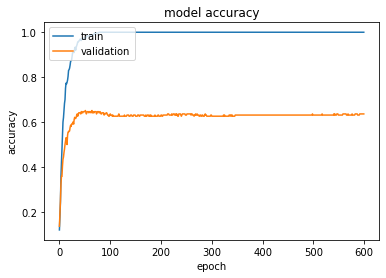

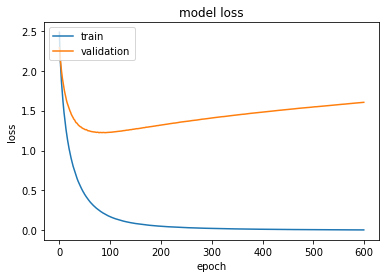

In [57]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Test Accuracy

5/5 [==============================] - 1s 211ms/step
              precision    recall  f1-score   support

           0       0.47      0.39      0.42        18
           1       0.07      0.17      0.10         6
           2       0.60      0.41      0.49        22
           3       0.47      0.47      0.47        15
           4       0.40      0.46      0.43        13
           5       0.60      0.53      0.56        17
           6       0.40      0.50      0.44        12
           7       0.60      0.64      0.62        14
           8       0.47      0.41      0.44        17
           9       0.67      0.62      0.65        16

    accuracy                           0.47       150
   macro avg       0.47      0.46      0.46       150
weighted avg       0.51      0.47      0.49       150

Confusion matrix:


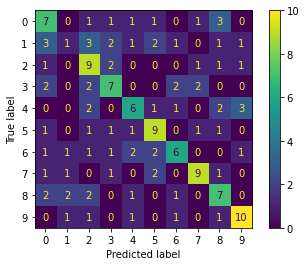

In [58]:
y_predict_prob = vgg_model_transfer.predict(imgs_resized_test)
y_predict = y_predict_prob.argmax(axis=-1)

conf_mx = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(conf_mx).plot()

print(classification_report(y_predict, y_test))
print('Confusion matrix:')

## Base Line Model

In [74]:
x=Sequential()
x.add(tf.keras.layers.Conv2D(16, input_shape=(64, 64, 3), kernel_size = (5, 5), activation = 'relu', padding = 'same'))
x.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
x.add(tf.keras.layers.Conv2D(16, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
x.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
x.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
x.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
x.add(tf.keras.layers.Flatten())
x.add(tf.keras.layers.Dense(32, kernel_regularizer=l2(0.008), bias_regularizer=l2(0.008), activation='relu'))
x.add(Dropout(0.3))
x.add(tf.keras.layers.Dense(10, activation='softmax'))

In [75]:
Adam= tf.keras.optimizers.Adam(learning_rate=0.0001, name="Adam")
x.compile(loss='categorical_crossentropy', optimizer=Adam,  metrics=['acc'])

history2 = x.fit(imgs_resized_train, y_train, batch_size=64, epochs=600, verbose=2, 
                                 validation_data=(imgs_resized_val, y_val))

Epoch 1/600
5/5 - 2s - loss: 2.7775 - acc: 0.1133 - val_loss: 2.7633 - val_acc: 0.1212 - 2s/epoch - 306ms/step
Epoch 2/600
5/5 - 1s - loss: 2.7620 - acc: 0.1100 - val_loss: 2.7547 - val_acc: 0.1212 - 510ms/epoch - 102ms/step
Epoch 3/600
5/5 - 1s - loss: 2.7430 - acc: 0.1500 - val_loss: 2.7474 - val_acc: 0.1111 - 504ms/epoch - 101ms/step
Epoch 4/600
5/5 - 1s - loss: 2.7407 - acc: 0.1100 - val_loss: 2.7414 - val_acc: 0.1313 - 508ms/epoch - 102ms/step
Epoch 5/600
5/5 - 1s - loss: 2.7573 - acc: 0.0933 - val_loss: 2.7367 - val_acc: 0.1263 - 529ms/epoch - 106ms/step
Epoch 6/600
5/5 - 1s - loss: 2.7377 - acc: 0.0967 - val_loss: 2.7325 - val_acc: 0.1364 - 521ms/epoch - 104ms/step
Epoch 7/600
5/5 - 1s - loss: 2.7285 - acc: 0.1100 - val_loss: 2.7285 - val_acc: 0.1465 - 501ms/epoch - 100ms/step
Epoch 8/600
5/5 - 1s - loss: 2.7299 - acc: 0.1133 - val_loss: 2.7245 - val_acc: 0.1364 - 526ms/epoch - 105ms/step
Epoch 9/600
5/5 - 1s - loss: 2.7195 - acc: 0.1200 - val_loss: 2.7208 - val_acc: 0.1364 - 51

## Train&valid accuracies

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


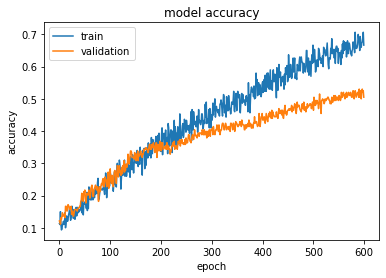

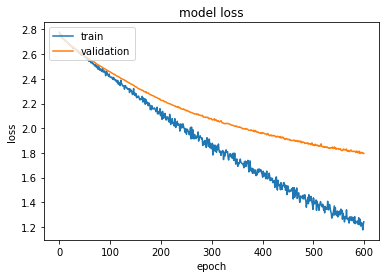

In [76]:
print(history2.history.keys())
#  "Accuracy"
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Test Accuracy

5/5 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.40      0.50      0.44        12
           1       0.20      0.30      0.24        10
           2       0.47      0.30      0.37        23
           3       0.47      0.64      0.54        11
           4       0.40      0.43      0.41        14
           5       0.40      0.35      0.38        17
           6       0.27      0.29      0.28        14
           7       0.47      0.39      0.42        18
           8       0.33      0.36      0.34        14
           9       0.47      0.41      0.44        17

    accuracy                           0.39       150
   macro avg       0.39      0.40      0.39       150
weighted avg       0.40      0.39      0.39       150

Confusion matrix:


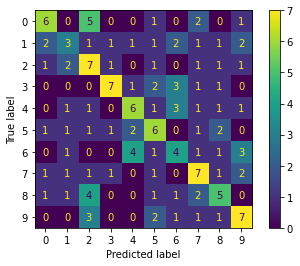

In [66]:
y_predict_BL = x.predict(imgs_resized_test)
y_predict_BL = y_predict_BL.argmax(axis=-1)

conf_mx = confusion_matrix(y_test, y_predict_BL)
ConfusionMatrixDisplay(conf_mx).plot()

print(classification_report(y_predict_BL, y_test))
print('Confusion matrix:')

## VGG+ BL Model

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False,  input_shape=(64, 64, 3))
for layer in VGG_model.layers[6:]:
    layer.trainable = False


In [ ]:
x = VGG_model.layers[-1].output

In [ ]:
x = Flatten()(x)
x= Dense(128, kernel_regularizer=l2(0.008), bias_regularizer=l2(0.008), activation='relu')(x)
x=Dropout(0.3)(x)
out= Dense(10, activation='softmax')(x)
VGG_model_transfer2 = Model(inputs=VGG_model.input, outputs=out)

## Train&Valid accuracies

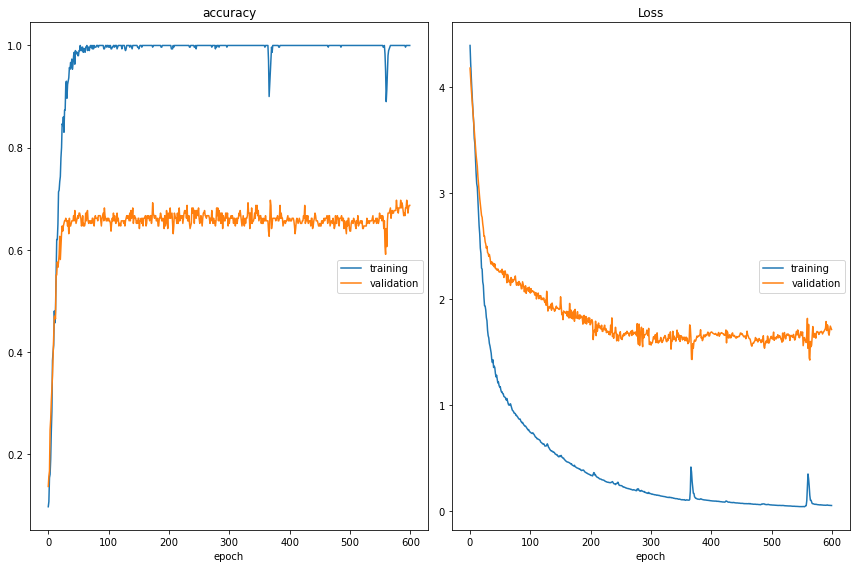

accuracy
	training         	 (min:    0.097, max:    1.000, cur:    1.000)
	validation       	 (min:    0.136, max:    0.697, cur:    0.687)
Loss
	training         	 (min:    0.041, max:    4.393, cur:    0.052)
	validation       	 (min:    1.424, max:    4.180, cur:    1.713)
10/10 - 13s - loss: 0.0522 - accuracy: 1.0000 - val_loss: 1.7130 - val_accuracy: 0.6869 - 13s/epoch - 1s/step


In [99]:
VGG_model_transfer2.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
historyL = VGG_model_transfer2.fit(imgs_resized_train, y_train, epochs=600, verbose=2, validation_data=(imgs_resized_val, y_val),callbacks= [PlotLossesKeras()])

## Test Accuracy

5/5 [==============================] - 1s 263ms/step
              precision    recall  f1-score   support

           0       0.40      0.32      0.35        19
           1       0.20      0.38      0.26         8
           2       0.67      0.37      0.48        27
           3       0.40      0.55      0.46        11
           4       0.40      0.67      0.50         9
           5       0.60      0.64      0.62        14
           6       0.27      0.40      0.32        10
           7       0.73      0.46      0.56        24
           8       0.33      0.45      0.38        11
           9       0.67      0.59      0.62        17

    accuracy                           0.47       150
   macro avg       0.47      0.48      0.46       150
weighted avg       0.53      0.47      0.48       150

Confusion matrix:


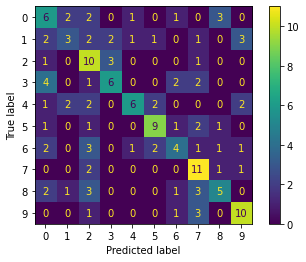

In [100]:
y_predict_BL_vgg = VGG_model_transfer2.predict(imgs_resized_test)
y_predict_BL = y_predict_BL_vgg.argmax(axis=-1)

conf_mx = confusion_matrix(y_test, y_predict_BL)
ConfusionMatrixDisplay(conf_mx).plot()

print(classification_report(y_predict_BL, y_test))
print('Confusion matrix:')

## augmented data

In [169]:
trainData = "C:/Users/mm/Desktop/output/aug/train"
train_class_names = os.listdir((trainData))
train_class_namesAug=train_class_names
train_class_names_label=np.array(train_class_names)
train_class_names_label
train_class_namesAug

['egypt',
 'France',
 'Greece',
 'India',
 'italy',
 'Malysia',
 'Spain',
 'turkey',
 'UK2',
 'USA']

In [170]:
le = preprocessing.LabelEncoder()
le.fit(train_class_names_label)
le.classes_

array(['France', 'Greece', 'India', 'Malysia', 'Spain', 'UK2', 'USA',
       'egypt', 'italy', 'turkey'], dtype='<U7')

In [171]:
train_class_names_label=le.transform(train_class_names_label)
train_class_names_label

array([7, 0, 1, 2, 8, 3, 4, 9, 5, 6])

In [172]:
testData ="C:/Users/mm/Desktop/output/aug/val"
testing_class_names = os.listdir((testData))
testing_class_names_label= np.array(train_class_names)
testing_class_names_label
testing_class_names_label=le.transform(testing_class_names_label)
testing_class_names_label

array([7, 0, 1, 2, 8, 3, 4, 9, 5, 6])

In [173]:
Data_Train_aug =readData(train_class_names , trainData)
Data_val_aug  =readData(testing_class_names ,testData)

In [174]:
X_train=[]
y_train=[]
for index , ele in enumerate(Data_Train_aug):
    for  j , img  in enumerate(ele):
        X_train.append(cv2.resize(cv2.imread(img), (64,64)))
        y_train.append(train_class_names_label[index])

In [175]:
X_val=[]
y_val=[]
for index , ele in enumerate(Data_val_aug):
    for  j , img  in enumerate(ele):
        X_val.append(cv2.resize(cv2.imread(img),(64,64)))
        y_val.append(testing_class_names_label[index])

In [176]:
mlb= LabelBinarizer()
y_train=mlb.fit_transform(y_train)
y_val=mlb.fit_transform(y_val)

In [177]:
imgs_resized_train=[]
for img in X_train: imgs_resized_train.append(resize_img(img,(64,64,3)))
    
imgs_resized_train=np.array(imgs_resized_train)

In [178]:
imgs_resized_valid=[]
for img in X_val: imgs_resized_valid.append(resize_img(img,(64,64,3)))
imgs_resized_valid=np.array(imgs_resized_valid)

## VGG16 + BL

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False,  input_shape=(64, 64, 3))
for layer in VGG_model.layers[6:]:
    layer.trainable = False
x = VGG_model.layers[-1].output
x = Flatten()(x)
x= Dense(128, kernel_regularizer=l2(0.008), bias_regularizer=l2(0.008), activation='tanh')(x)
x=Dropout(0.3)(x)
out= Dense(10, activation='softmax')(x)
VGG_model_transfer_AUG = Model(inputs=VGG_model.input, outputs=out)

In [179]:
VGG_model_transfer_AUG.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

## Train&Valid Accuracies

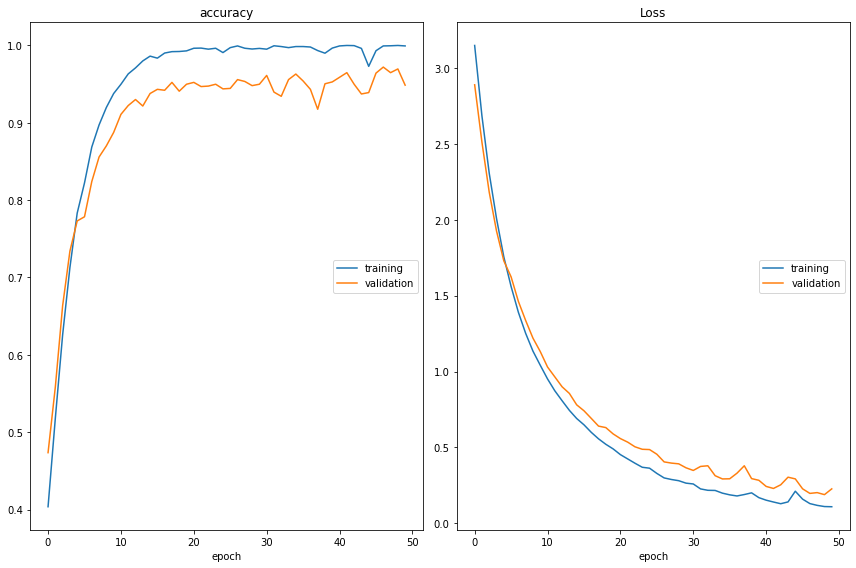

accuracy
	training         	 (min:    0.404, max:    1.000, cur:    0.999)
	validation       	 (min:    0.474, max:    0.972, cur:    0.949)
Loss
	training         	 (min:    0.109, max:    3.149, cur:    0.109)
	validation       	 (min:    0.189, max:    2.890, cur:    0.227)
157/157 - 206s - loss: 0.1090 - accuracy: 0.9992 - val_loss: 0.2268 - val_accuracy: 0.9485 - 206s/epoch - 1s/step


In [180]:
historyL = VGG_model_transfer_AUG.fit(imgs_resized_train, y_train, epochs=50, verbose=2, validation_data=(imgs_resized_valid, y_val),callbacks= [PlotLossesKeras()])

## Test Accuracy

5/5 [==============================] - 2s 266ms/step
              precision    recall  f1-score   support

           0       0.40      0.50      0.44        12
           1       0.07      0.25      0.11         4
           2       0.53      0.31      0.39        26
           3       0.47      0.39      0.42        18
           4       0.27      0.36      0.31        11
           5       0.53      0.57      0.55        14
           6       0.33      0.71      0.45         7
           7       0.67      0.48      0.56        21
           8       0.60      0.39      0.47        23
           9       0.60      0.64      0.62        14

    accuracy                           0.45       150
   macro avg       0.45      0.46      0.43       150
weighted avg       0.51      0.45      0.46       150

Confusion matrix:


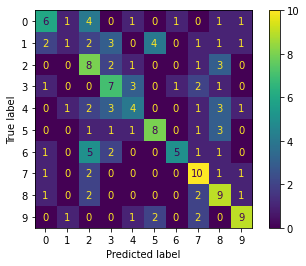

In [181]:
y_predict_BL_vgg = VGG_model_transfer_AUG.predict(imgs_resized_test)
y_predict_BL = y_predict_BL_vgg.argmax(axis=-1)

conf_mx = confusion_matrix(y_test, y_predict_BL)
ConfusionMatrixDisplay(conf_mx).plot()

print(classification_report(y_predict_BL, y_test))
print('Confusion matrix:')

## Saving Best Model

In [182]:
import pickle
pickle.dump(VGG_model_transfer_AUG, open('VISion.pkl', 'wb'))

Keras model saving:
File Name                                             Modified             Size
config.json                                    2022-11-23 03:20:15        12238
metadata.json                                  2022-11-23 03:20:15           64
model/layers/block1_conv1/weights.npz          2022-11-23 03:20:15        23186
model/layers/block1_conv2/weights.npz          2022-11-23 03:20:15       444818
model/layers/block2_conv1/weights.npz          2022-11-23 03:20:15       887954
model/layers/block2_conv2/weights.npz          2022-11-23 03:20:15      1772690
model/layers/block3_conv1/weights.npz          2022-11-23 03:20:15      3543698
model/layers/block3_conv2/weights.npz          2022-11-23 03:20:15      7082642
model/layers/block3_conv3/weights.npz          2022-11-23 03:20:15      7082642
model/layers/block4_conv1/weights.npz          2022-11-23 03:20:16     14163602
model/layers/block4_conv2/weights.npz          2022-11-23 03:20:16     28319378
model/layers/block4_

## RES NET 50

In [86]:
# resnet_model = Sequential()

# pretrained_model= tf.keras.applications.ResNet50(include_top=False,
#                    input_shape=(64,64,3),
#                    pooling='avg',classes=10,
#                    weights='imagenet')
res_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False,  input_shape=(64, 64, 3))
for layer in res_model.layers:
    layer.trainable = False


x = res_model.layers[-1].output
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

res_model_transfer = Model(inputs=res_model.input, outputs=x)

# for layer in pretrained_model.layers[0:6]:
#         layer.trainable=False

# resnet_model.add(pretrained_model)

## Train & Valid Accuracies

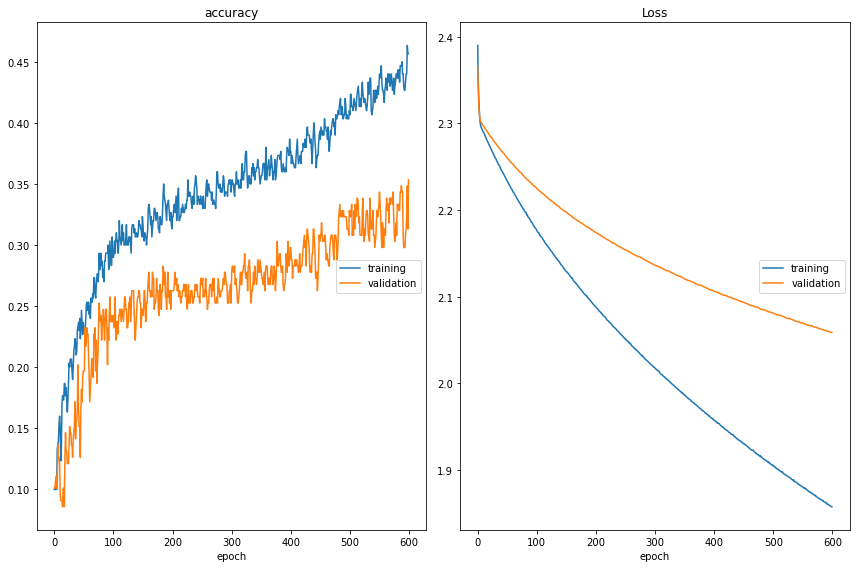

accuracy
	training         	 (min:    0.100, max:    0.463, cur:    0.457)
	validation       	 (min:    0.086, max:    0.354, cur:    0.354)
Loss
	training         	 (min:    1.858, max:    2.390, cur:    1.858)
	validation       	 (min:    2.059, max:    2.366, cur:    2.059)
5/5 - 2s - loss: 1.8576 - accuracy: 0.4567 - val_loss: 2.0587 - val_accuracy: 0.3535 - 2s/epoch - 426ms/step


In [87]:
res_model_transfer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, name="Adam"),loss='categorical_crossentropy',metrics=['accuracy'])
history_res = res_model_transfer.fit(imgs_resized_train, y_train, batch_size=64, epochs=600, verbose=2,  validation_data=(imgs_resized_val, y_val),callbacks=PlotLossesKeras())

## Test Accuracy

5/5 [==============================] - 2s 135ms/step
              precision    recall  f1-score   support

           0       0.20      0.20      0.20        15
           1       0.07      0.20      0.10         5
           2       0.13      0.29      0.18         7
           3       0.13      0.12      0.13        16
           4       0.27      0.25      0.26        16
           5       0.20      0.20      0.20        15
           6       0.20      0.13      0.16        23
           7       0.60      0.29      0.39        31
           8       0.07      0.08      0.07        13
           9       0.27      0.44      0.33         9

    accuracy                           0.21       150
   macro avg       0.21      0.22      0.20       150
weighted avg       0.27      0.21      0.22       150

Confusion matrix:


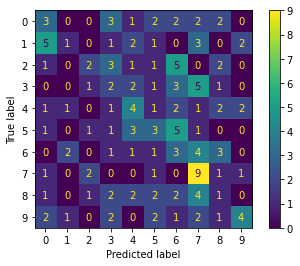

In [90]:
y_predict_res = res_model_transfer.predict(imgs_resized_test)
y_predict_res = y_predict_res.argmax(axis=-1)

conf_mx = confusion_matrix(y_test, y_predict_res)
ConfusionMatrixDisplay(conf_mx).plot()

print(classification_report(y_predict_res, y_test))
print('Confusion matrix:')